In [2]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

In [3]:
## READING MICE DATA
mice = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex02-05_31_19-Edited.xlsx')
mice.head()

,Minutes,Date,Time,CC006-315 EXP 2 MRSA CC Deg. C Data,CC006-315 EXP 2 MRSA CC Cnts Data,CC006-316 EXP 2 MRSA CC Deg. C Data,CC006-316 EXP 2 MRSA CC Cnts Data,CC006-317 EXP 2 MRSA CC Deg. C Data,CC006-317 EXP 2 MRSA CC Cnts Data,CC019-1392 EXP 2 MRSA CC Deg. C Data,...,CC043-456 EXP 2 MRSA CC Deg. C Data,CC043-456 EXP 2 MRSA CC Cnts Data,CC043-457 EXP 2 MRSA CC Deg. C Data,CC043-457 EXP 2 MRSA CC Cnts Data,CC051-489 EXP 2 MRSA CC Deg. C Data,CC051-489 EXP 2 MRSA CC Cnts Data,CC051-490 EXP 2 MRSA CC Deg. C Data,CC051-490 EXP 2 MRSA CC Cnts Data,CC057-610 EXP 2 MRSA CC Deg. C Data,CC057-610 EXP 2 MRSA CC Cnts Data
0,1,2019-05-24,09:38:29,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,2,2019-05-24,09:39:29,NaN,8,NaN,0,NaN,13,NaN,...,NaN,3,NaN,8,NaN,13,NaN,0,NaN,0
2,3,2019-05-24,09:40:29,36.21,26,36.37,34,37.14,36,36.29,...,35.58,0,35.78,1,36.46,29,36.43,16,38.14,10
3,4,2019-05-24,09:41:29,36.33,16,36.60,30,37.20,41,36.35,...,35.58,28,35.76,1,36.54,16,36.48,3,38.13,7
4,5,2019-05-24,09:42:29,36.47,27,36.73,0,37.12,23,36.40,...,35.72,0,35.73,19,36.61,17,36.56,0,38.15,43


In [4]:
#Slicing the df to only get the temperature of each mice
#We want to do this so we can create a loop

mice_temp = mice.iloc[:,3::2] 
mice_temp.head()

,CC006-315 EXP 2 MRSA CC Deg. C Data,CC006-316 EXP 2 MRSA CC Deg. C Data,CC006-317 EXP 2 MRSA CC Deg. C Data,CC019-1392 EXP 2 MRSA CC Deg. C Data,CC019-1393 EXP 2 MRSA CC Deg. C Data,CC043-455 EXP 2 MRSA CC Deg. C Data,CC043-456 EXP 2 MRSA CC Deg. C Data,CC043-457 EXP 2 MRSA CC Deg. C Data,CC051-489 EXP 2 MRSA CC Deg. C Data,CC051-490 EXP 2 MRSA CC Deg. C Data,CC057-610 EXP 2 MRSA CC Deg. C Data
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.21,36.37,37.14,36.29,36.77,35.38,35.58,35.78,36.46,36.43,38.14
3,36.33,36.60,37.20,36.35,36.91,35.40,35.58,35.76,36.54,36.48,38.13
4,36.47,36.73,37.12,36.40,37.01,35.41,35.72,35.73,36.61,36.56,38.15


x = mice["Minutes"]
y = mice_temp
for i in y:
    #masking the data (getting rid of N/A's)
    mask = y[i].notna() # will keep the true values
    x1 = x[mask]
    y1 = y[mask]
    #Plotting
    plt.plot(x1,y1[i])
    plt.xlabel("Minutes") #x label
    plt.ylabel("Temperature (Celsius)") #y label
    plt.grid()
    plt.title("Scoring")
    


#Time Delay Embedding
    Y = tde.tde(y1)
    Y=Y.T #transporting the data
    Y


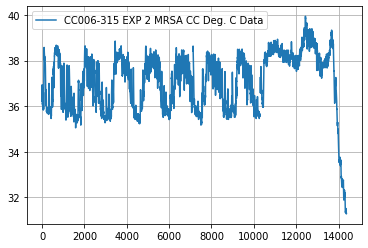

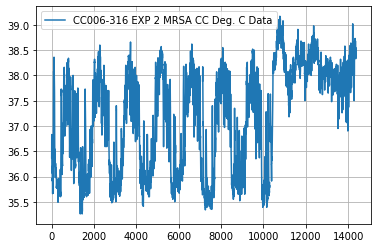

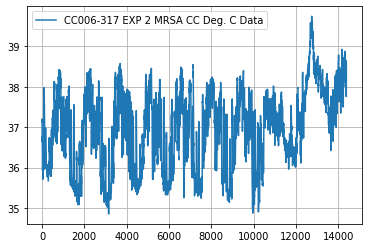

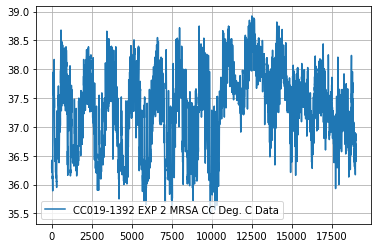

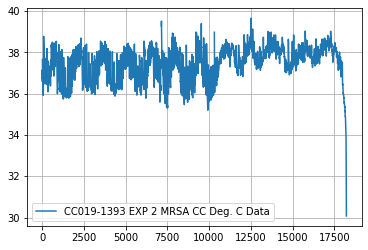

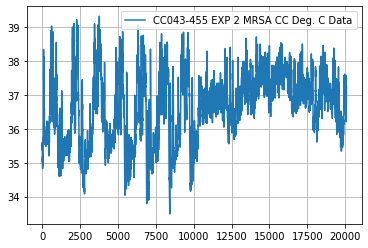

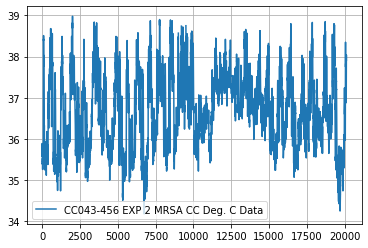

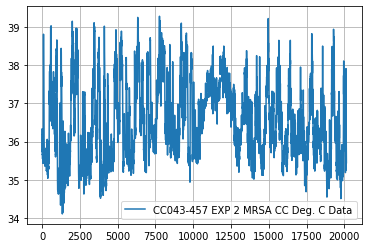

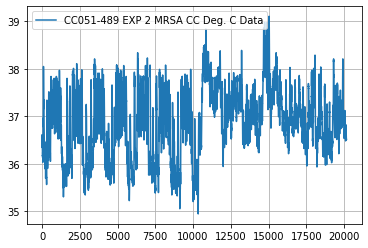

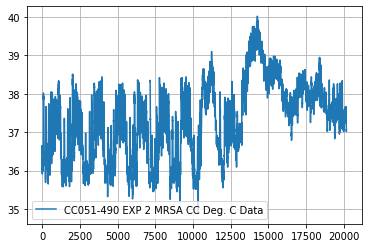

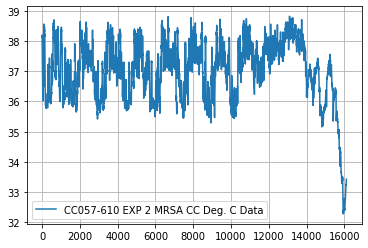

In [5]:
x = mice["Minutes"]
y = mice_temp
#list=list(y.columns)

for i in range (0,11):
    #masking the data (getting rid of N/A's)
    #y_col = y.iloc[:,i]
    #mask = y_col.notna()
    #mask = y.notna() # will keep the true values
    #x1 = x[mask]
    y1 = y.iloc[:,i]
    df = pd.DataFrame(y1)
    #Plotting
    #plt.subplot(3, 4, i+1)
    df.plot()
    plt.grid()
    suffix = str(i).zfill(4)
    filename = "image_02_%s.png"%suffix
    plt.savefig(filename)
    #plt.plot(x1,y1)
    #plt.xlabel("Minutes") #x label
    #plt.ylabel("Temperature (Celsius)") #y label
    #plt.grid()
    #plt.title(str(y[i]))
    #plt.figure(i)

In [41]:
type(mice_temp)

pandas.core.frame.DataFrame

In [6]:
dim(mice)

NameError: name 'dim' is not defined